In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

import numpy as np

In [8]:
%matplotlib inline
plt.style.use("ggplot")

In [9]:
data = pd.read_csv("/data/harris.csv")

## In-Class Exercise 1: Polynomial Regression

Add a cubic polynomial curve to the plot below.

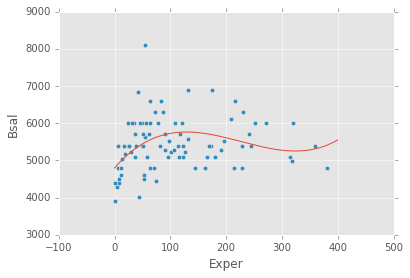

In [18]:
data.plot.scatter(x="Exper", y="Bsal")



X = pd.DataFrame({"Exper": data["Exper"] , "Exper^2": data["Exper"] ** 2, "Exper^3": data["Exper"] ** 3})

model = LinearRegression()

#for recreating dataframe for reg equation up to degree 3
def make_data_frame(x):
    
    return pd.DataFrame({
            "x": x,
            "x^2": x ** 2,
            "x^3": x ** 3
        })

model.fit(X, data["Bsal"])

#we need test plots to plot model cubic curve

x_test = np.linspace(0,400,1000)
#To use model.predict()
X_test =  make_data_frame(x_test)
#must reconstruct x_test before using predict

y_test = model.predict(X_test) # construct the regression equation


plt.plot(x_test, y_test, '-')



## In-Class Exercise 2: $K$-Nearest Neighbors

Add the curve that is estimated by $k$-nearest neighbors to the plot below. What happens as you vary $k$? Then use cross-validation to select the optimal $k$.

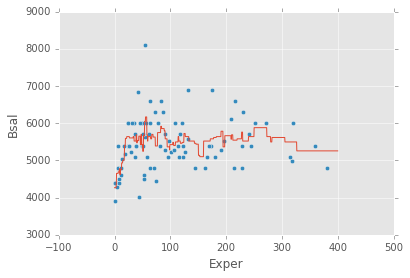

In [24]:
data.plot.scatter(x="Exper", y="Bsal")

from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors = 5, weights = "uniform") #equal weights
#pass in training data
model.fit(data[["Exper"]],data['Bsal'])

x_test = np.linspace(0,400,1000)

#predict expects same dataframe

y_test = model.predict(pd.DataFrame(x_test)) # construct the regression equation
# #must reconstruct x_test before using predict

plt.plot(x_test, y_test, '-')

#You get flat lines because at test points inbetween, you have the same 5 nearest neighbors.

#as k increases, it becomes much more smoother because you have more and more of the same k nearest neighbors.
# if k = 1, graph gets very spiky.

Use cross-validation to determine the optimal $k$.

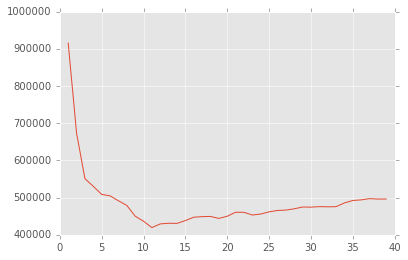

In [27]:
from sklearn.cross_validation import cross_val_score

test_errors = []

for k in range(1,40):
    
    model = KNeighborsRegressor(k)
    test_errors.append(np.mean(-cross_val_score(model, data[["Exper"]], data['Bsal'], cv = 10, scoring = "mean_squared_error"))) #test error
    
plt.plot(range(1,40), test_errors)

#k = 11 is the optimal

## In-Class Exercise 3: Decision Trees

Add the curve that is estimated by a decision tree to the plot below. What happens as you vary the depth of the tree?

In [ ]:
#if you were to use calculated value and samples, you can can get mean squared error

#How do you take traiing data and make a dcision tree?

#Search thru all possible vars and all possible points where yo u can SPLIT up the variables. Find split that minimizes mse.
#See slides for pic

#for ea variable, must make binary tree

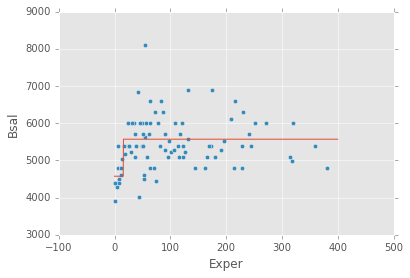

In [33]:
data.plot.scatter(x="Exper", y="Bsal")

from sklearn.tree import DecisionTreeRegressor
from sklearn.externals.six import StringIO

model = DecisionTreeRegressor(max_depth = 1)
model.fit(data[["Exper"]],data["Bsal"])

x_test = np.linspace(0,400,1000)
y_test = model.predict(pd.DataFrame(x_test))

plt.plot(x_test, y_test, '-')


#As depth increases, more jaggedy graph
# if depth = 1, only 1 split, so very smooth graph

#to see visual of decision tree
# with open("tree.dot", "w") as f:
#     f = export_graphviz(model, out_file = f)
    
# dot -Tpdf tree.dot -o tree.pdf


Use cross-validation to determine the optimal tree depth.

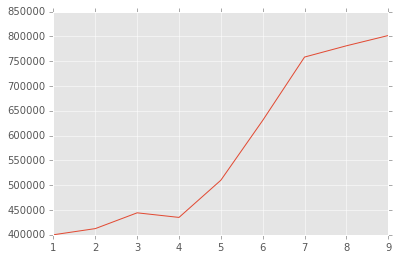

In [37]:

test_errors = []

for depth in range(1,10):
    
    model = DecisionTreeRegressor(max_depth = depth)
    test_errors.append(-np.mean(cross_val_score(model, data[["Exper"]], data['Bsal'], cv = 10, scoring = "mean_squared_error"))) #test error
    
plt.plot(range(1,10), test_errors)

#at 1 split, its optimal tree depth.